In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np
from pylbm import lbm

In [6]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

epochs = 1
epochs = 302
eps = 0.01
omegas = np.arange(0.1, 1.51, 0.2).round(decimals=1)
omega = 0.5
i_dim, j_dim = 200, 100
x = np.arange(i_dim)
y = np.arange(j_dim)
X, Y = np.meshgrid(x, y)

/tmp/ipykernel_1831/3047559102.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


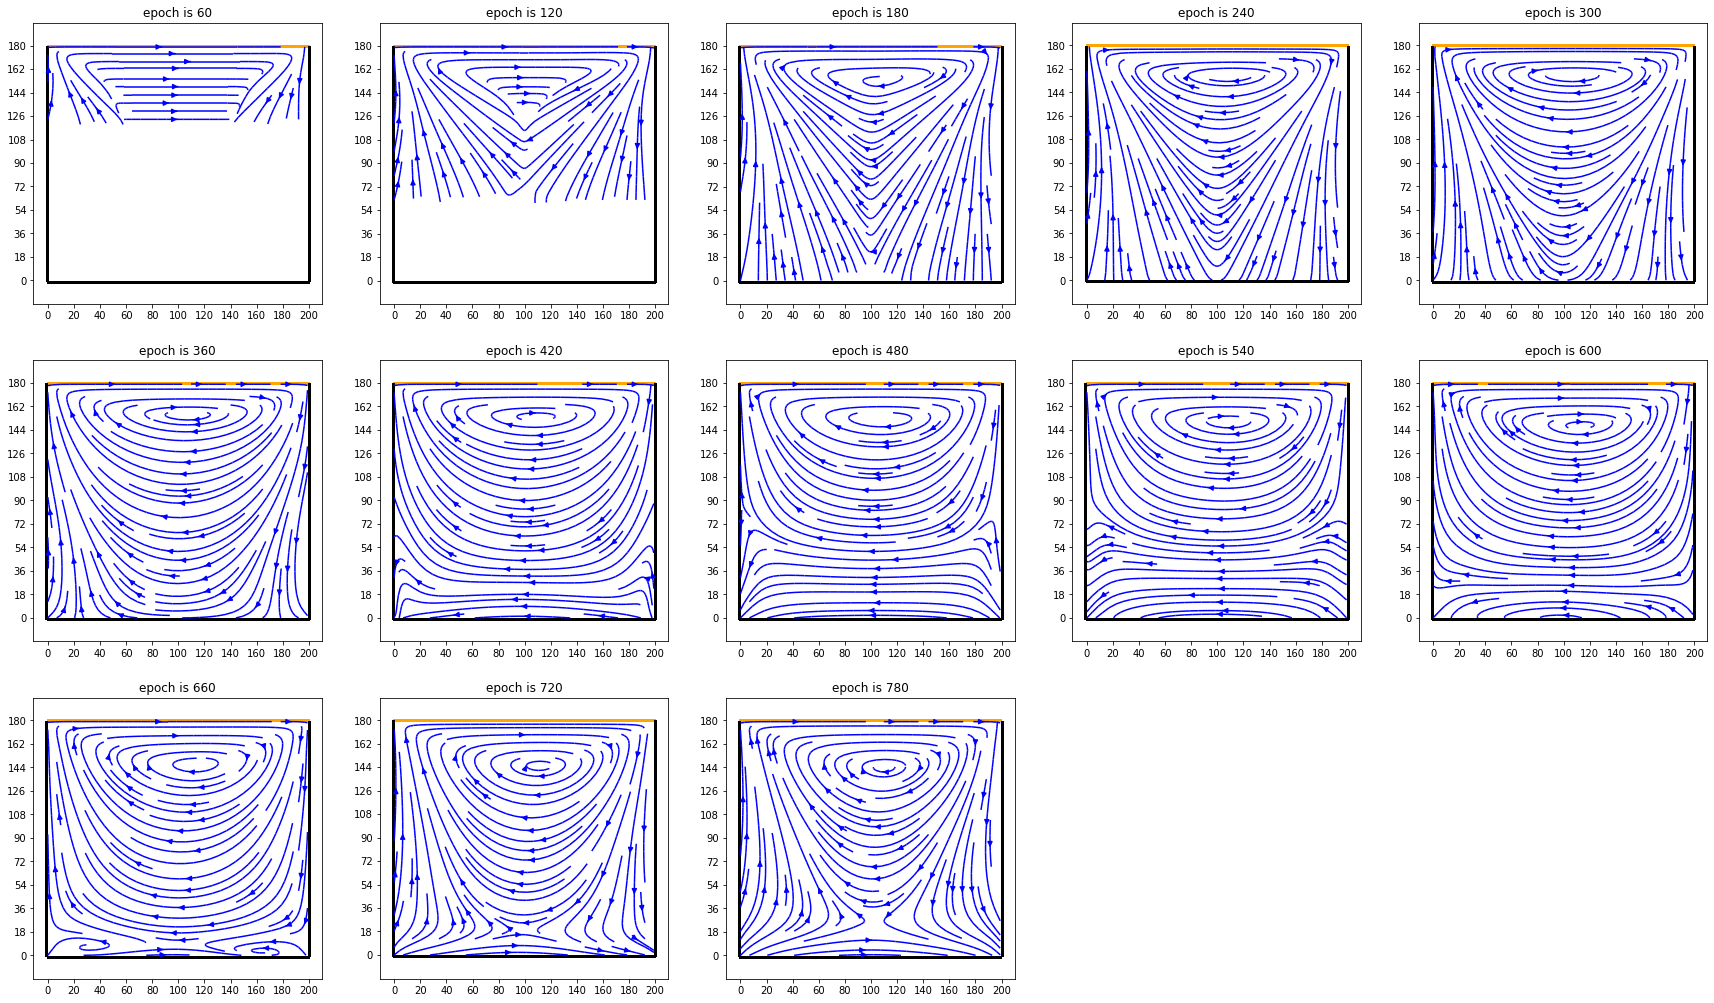

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(30,30))
plt.axis('off')

epochs = 801
i_dim, j_dim = 200, 180
print_epoch = 60


i = 1
top_wall, bottom_wall, left_wall, right_wall = False,True,True,True
top_moving_lid = True

r_ij = lbm.rho_init(i_dim=i_dim, j_dim=j_dim, r_mean=1.0, eps=0.)
u_aij = lbm.local_avg_velocity_init(i_dim=i_dim, j_dim=j_dim, u_mean=0.0, eps=0.)
f_cij = lbm.f_eq(u_aij=u_aij, r_ij=r_ij)

axes = []
for t in range(epochs):
    f_cij_old = f_cij.copy()
    f_cij = lbm.stream(f_cij=f_cij)
    if top_wall: f_cij = lbm.apply_top_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if bottom_wall: f_cij = lbm.apply_bottom_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if left_wall: f_cij = lbm.apply_left_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    if right_wall: f_cij = lbm.apply_right_wall(f_cij=f_cij, f_cij_old=f_cij_old)
    f_cij = lbm.apply_sliding_top_wall(f_cij=f_cij, f_cij_old=f_cij_old, velocity=0.1)
    f_cij, u_aij = lbm.collision(f_cij=f_cij, omega=omega)
    

    if t%print_epoch == print_epoch-1:
        ax = plt.subplot(5,5,i)
        ax.margins(.05)
        if top_wall: ax.plot(np.arange(i_dim), np.zeros((i_dim))+j_dim, color='black', linewidth=3.0)
        if top_moving_lid: ax.plot(np.arange(i_dim), np.zeros((i_dim))+j_dim, color='orange', linewidth=3.0)
        if bottom_wall: ax.plot(np.arange(i_dim), np.zeros((i_dim))-1, color='black', linewidth=3.0)
        if left_wall: ax.plot(np.zeros(j_dim)-1, np.arange((j_dim)), color='black', linewidth=3.0)
        if right_wall: ax.plot(np.zeros(j_dim)+i_dim, np.arange((j_dim)), color='black', linewidth=3.0)
        ax.set_xticks(np.arange(0, i_dim+1, i_dim/10))
        ax.set_yticks(np.arange(0, j_dim+1, j_dim/10))
        # ax.grid(True)
        ax.axis("equal")
        # streamplot is really slow at big grids
        ax.streamplot(np.arange(i_dim), np.arange(j_dim), u_aij[0,:,:].T, u_aij[1,:,:].T, color='blue')
        ax.set_title("epoch is {}".format(t+1))
        i+=1   
        fig.add_axes(ax)

# fig.savefig('demo.png', bbox_inches='tight')
fig.show()
# plt.close()

### We know that moving top wall is working if top particles have same velocity as wall

# Reynoldsnumber
Divides the stable and unstable purturbations like turbulance.

If larger than 1 the system could show instability and turbulance.

For sliding lid in most work choose a reynoldsnumber ~1000. 

- Gives idea of what our outcome should look like.
- use 300 grid points as $R_e = 340/10 * l = 3.4 * 300 = 1000$ (theoretically derived with certrain omega)

Re is indicator that I am in the flow regime where simulation conforms to "normal" circumstances


# Diffusion constant phi

Set to 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
phi = np.zeros(100)
phi[49] = 1.
D = 1.0
dx = 1.
dt = 0.1
phi0 = phi

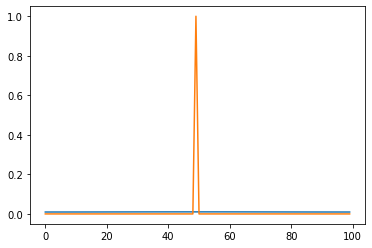

In [33]:
for i in range (10000):
    phi = phi + D*dt/dx**2*(np.roll(phi,1)-2.*phi+np.roll(phi,-1))
plt.plot(phi)
plt.plot(phi0)

Function still retains Gausian like distribution, but its super low.

15.625